# Графовые базы данных (Graph Databases)

## Введение

С начала 2000-х активно развиваются NoSQL базы данных, к которым также относятся графовые базы данных.

Графовые базы данных применяются для моделирования социальных графов (социальных сетей), в биоинформатике, а также для семантической паутины. Для задач с естественной графовой структурой данных графовые СУБД могут существенно превосходить реляционные по производительности, а также иметь преимущества в наглядности представления и простоте внесения изменений в схему базы данных.

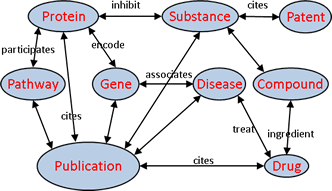

Преимущества графовых БД:

    - универсальность, так как в них можно хранить и реляционные, и документарные и сложные семантические данные. Например, добавление новых связей делает неприемлемой документарную базу данных, а рост количества JOIN-ов катастрофически снижает производительность реляционной БД. В этом случае графы оказываются наиболее универсальным вариантом, позволяющим подстраховаться на случай изменения требований и расширения функционала в будущем;
    - модель построения БД может меняться и модифицироваться в процессе развития приложения без изменения архитектуры и исходных запросов.

Недостатки графовых БД:

    - при незначительном количестве связей и больших объемах данных графовые БД демонстрируют значительно более низкую производительность (здесь преимущество имеют реляционные БД);
    - еще одним важным ограничением является то, что в данный момент практически не существует графовых баз данных, которые бы хорошо работали в параллельных архитектурах.

Основное отличие состоит в том, что в базе данных графов отношения хранятся на уровне отдельных записей, тогда как в реляционной базе данных структура определяется на более высоком уровне (определения таблиц).

Это имеет важные последствия:

* Реляционная база данных работает намного быстрее при работе с огромным количеством записей. В базе данных графов каждая запись должна проверяться индивидуально во время запроса, чтобы определить структуру данных, в то время как в реляционной базе данных это известно заранее.
* Реляционные базы данных используют меньше места для хранения, потому что им не нужно хранить все эти отношения.

Хранение всех взаимосвязей на уровне индивидуальных записей имеет смысл только в том случае, если в отношениях будет много вариаций; в противном случае вы просто повторяете одно и то же снова и снова. Это означает, что графовые базы данных хорошо подходят для нерегулярных сложных структур.

## Существующие графовые БД

Первая графовая СУБД Neo4j создана в 2007 году. По состоянию на начало 2020-х годов существуют десятки других графовых СУБД.

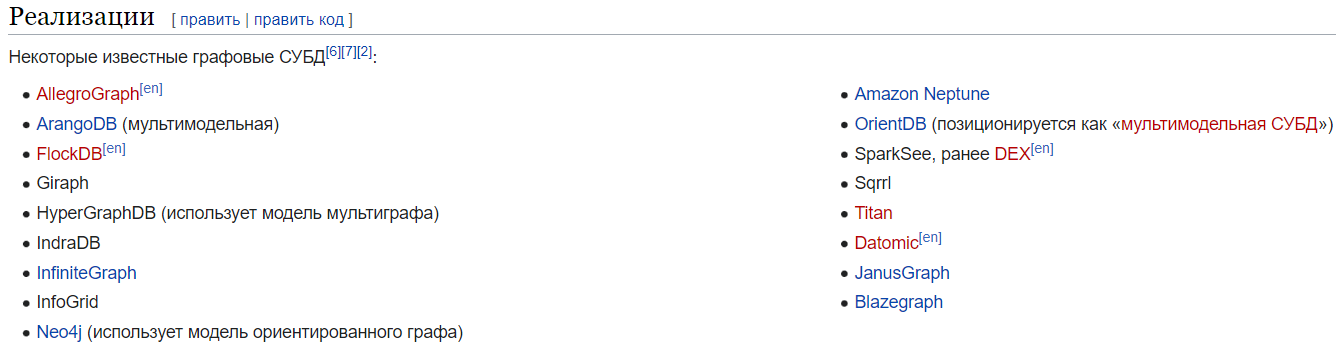

## Neo4j

Neo4j — графовая система управления базами данных с открытым исходным кодом, реализованная на Java. По состоянию на 2015 год считается самой распространённой графовой СУБД. Разработчик — американская компания Neo Technology, разработка ведётся с 2003 года.

<p style="text-align: center;"> 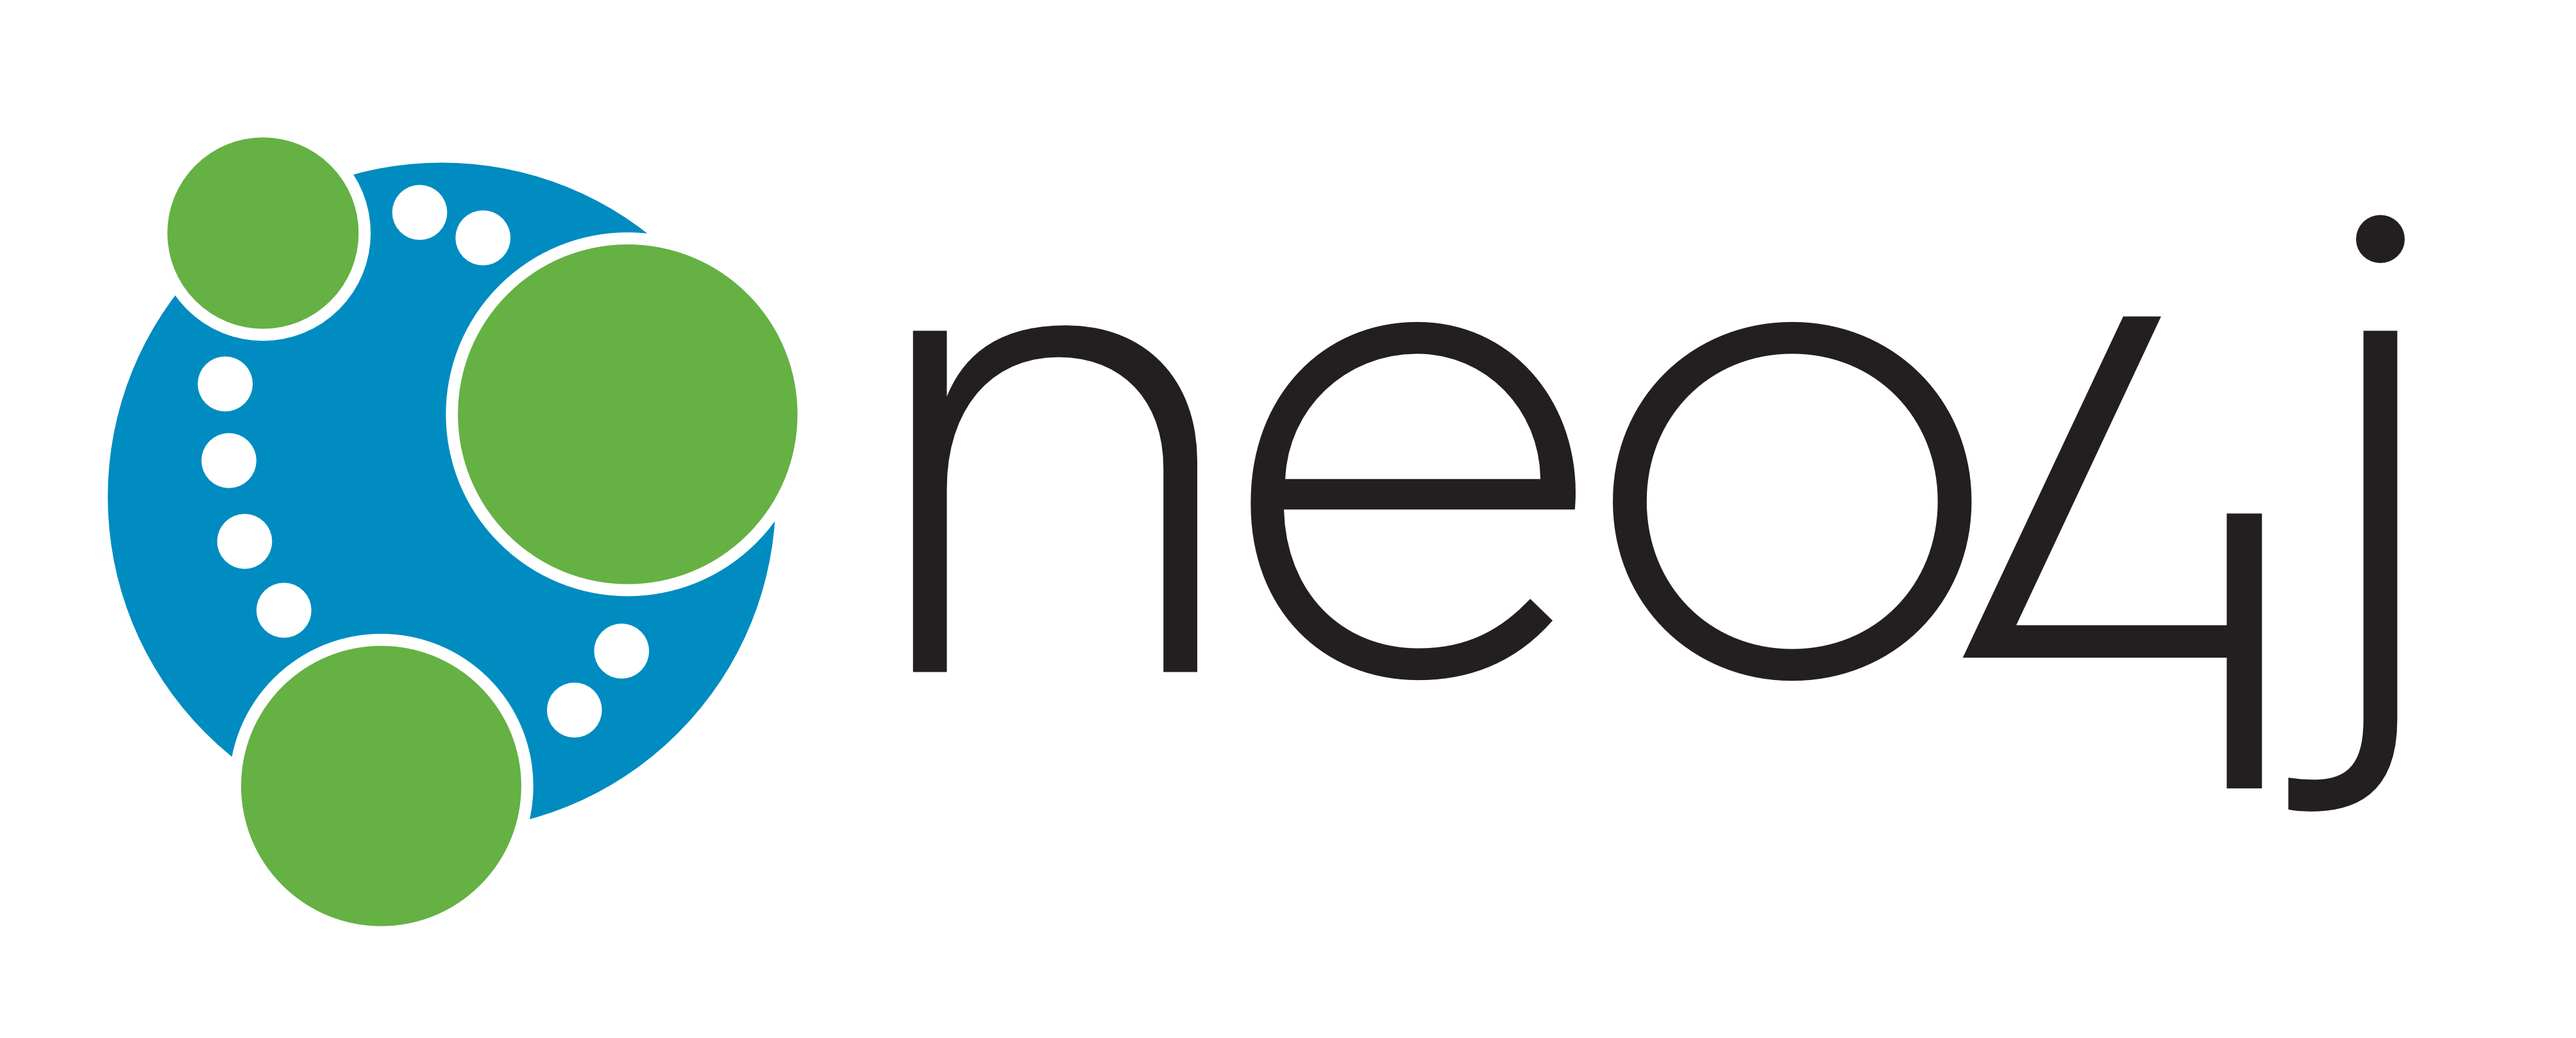 </p>

В СУБД используется собственный язык запросов — **Cypher**, но запросы можно делать и другими способами, например, напрямую через Java API.

### Продукты Neo4j

[Cсылка](https://neo4j.com/developer/graph-platform/)


1. **Neo4j Graph Database** - основная графовая база данных, созданная для хранения и извлечения данных.

2. **Neo4j Desktop** - приложение для управления локальными данными Neo4j.

3. **Neo4j Browser** - онлайн-интерфейс для запроса и просмотра данных в БД. Основные возможности визуализации предоставляются с использованием языка запросов Cypher.

4. **Neo4j Bloom** - инструмент визуализации для бизнес-пользователей, не требующий навыков программирования для просмотра и анализа данных. Документация также доступна в разделе документации.

5. **Neo4j Aura** - database-as-a-service, управляемая Neo4j, для графовых баз данных в облаке. Более подробную информацию можно найти на странице продукта.

6. **Graph Data Science** - официально-поддерживаемая библиотека для выполнения графовых алгоритмов и оптимизации корпоративных рабочих нагрузок и потоков. Также доступна документация к библиотеке.

## Синтаксис Cypher

### Создание вершин

Чтобы изобразить узел, нужно заключить его в круглые скобки `()`. Как и в случае с переменными в языках программирования, переменные можно называть как хотите и ссылаться на них с тем же именем позже в запросе. Например, `(var)`.

Вы можете указать анонимный узел, используя пустые круглые скобки `()`. Это означает, что вы не сможете вернуть этот узел позже в запросе.

`()`                  //anonymous node (no label or variable) can refer to any node in the database

`(p:Person)`          //using variable p and label Person

`(:Technology)`       //no variable, label Technology

`(work:Company)`      //using variable work and label Company

### Представление взаимосвязей

Чтобы в полной мере использовать возможности графовой базы данных, также необходимо выразить отношения между узлами. Отношения представлены в Cypher с помощью стрелок `->` или `<-`. Обратите внимание на синтаксис, похожий на стрелки и линии, соединяющие наши узлы в визуальном представлении. Дополнительная информация, например, как связаны узлы (тип отношения) и любые свойства, относящиеся к взаимосвязи, могут быть помещены в квадратные скобки внутри стрелки.

В примере стрелки с LIKES, IS_FRIENDS_WITH и WORKS_FOR между узлами являются нашими отношениями.

<p style="text-align: center;"> 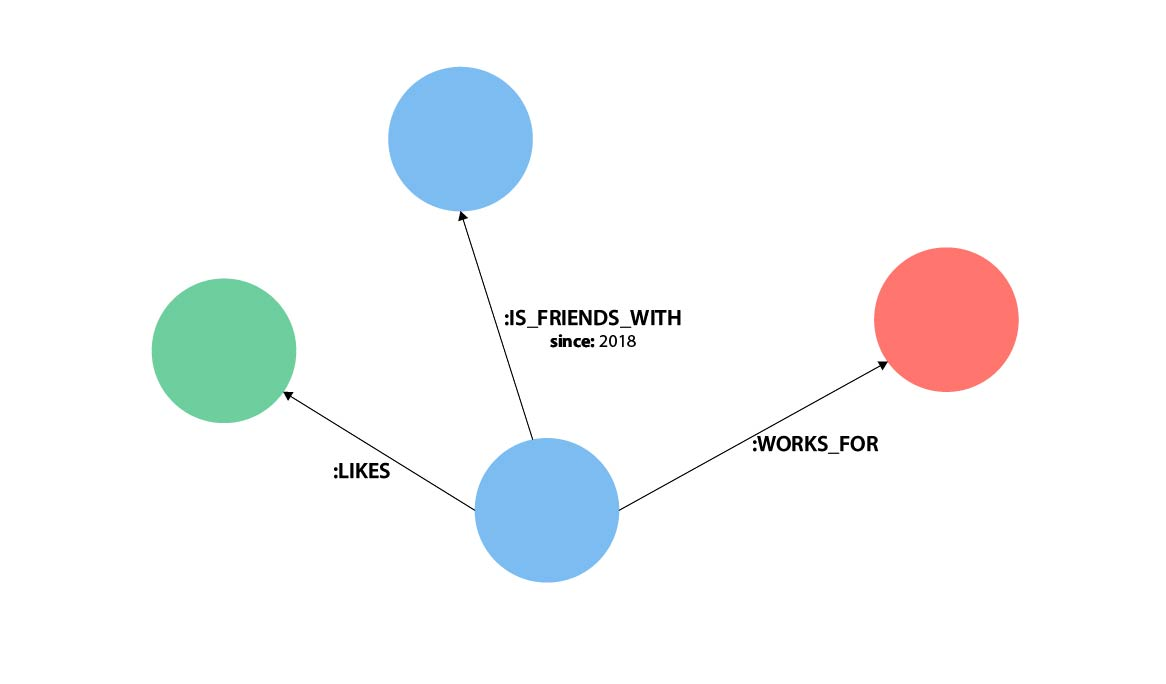 </p>

Ненаправленные отношения представлены без стрелки и только двумя черточками `--`. Это означает, что отношения могут развиваться в любом направлении. Хотя направление должно быть указано в базе данных, оно может быть сопоставлено с ненаправленным отношением, при котором Cypher игнорирует какое-либо конкретное направление и извлекает взаимосвязь и подключенные узлы, независимо от физического направления. Это позволяет запросам быть гибкими и не заставляет пользователя знать физическое направление отношений, хранящихся в базе данных.

**Примечание:** если данные хранятся с одним направлением отношения, а в запросе указывается другое направление, Cypher не вернет никаких результатов. В тех случаях, когда вы не уверены в направлении, лучше использовать ненаправленную связь и получить результат.

Пример:

//data stored with this direction

`CREATE (p:Person)-[:LIKES]->(t:Technology)`

//query relationship backwards will not return results

`MATCH (p:Person)<-[:LIKES]-(t:Technology)`

//better to query with undirected relationship unless sure of direction

`MATCH (p:Person)-[:LIKES]-(t:Technology)`

Отношения также могут представляться в виде переменных, например, `-[rel]->` или `-[rel:LIKES]->`, и к ним также можно обращаться в запросах.

### Свойства вершин и отношений

Свойства - это пары name-value, которые предоставляют дополнительную информацию о наших узлах и отношениях.

Node property: `(p:Person {name: 'Jennifer'})`

Relationship property: `-[rel:IS_FRIENDS_WITH {since: 2018}]->`

<p style="text-align: center;"> 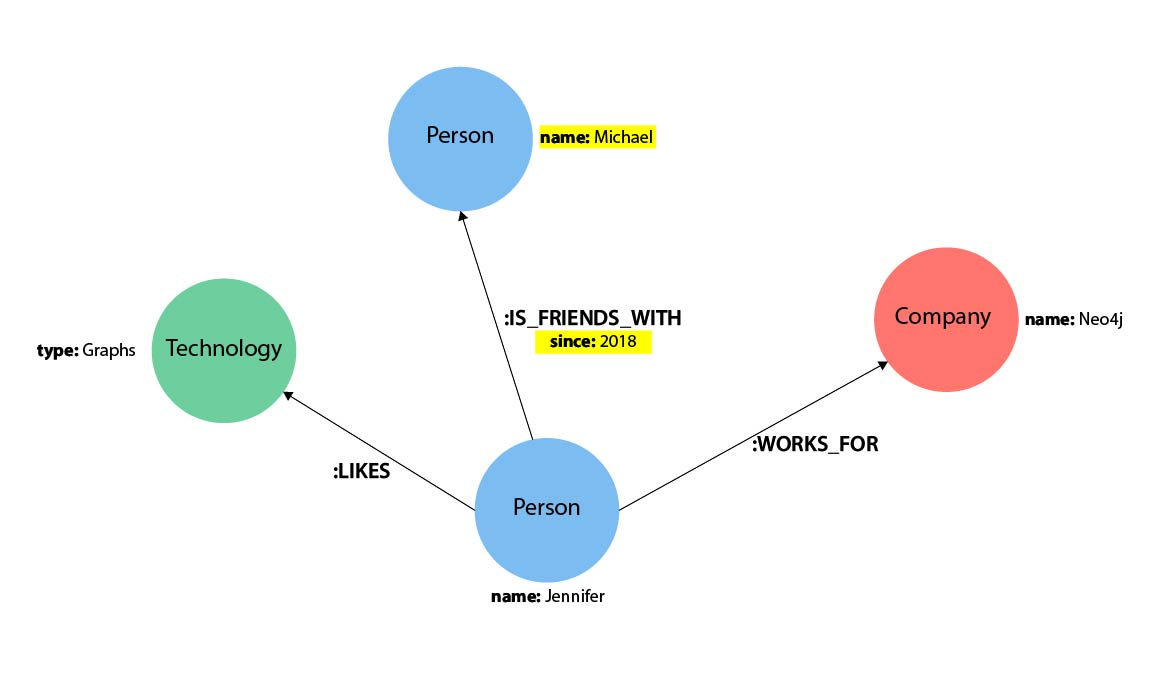 </p>


### Значения и типы

Cypher поддерживает несколько типов данных:

   - Structural types (Node, Relationship, Path);
   - Property types (Integer, Float, String, Boolean, Point, Date, Time, LocalTime, DateTime, LocalDateTime, and Duration);
   - Композитные типы (List, Map).
   
1. Structural types

   + могут возврщаться из запросов;
   - не могут использоваться как параметры;
   - не могут храниться как свойства.
   
**Path** - последовательность узлов и отношений.
   
2. Property types

   + могут возврашаться по запросу;
   + могут использоваться как параметры;
   + могут храниться как свойства.
   
3. Composite types

   + могут возвращаться по запросу;
   + могут использоваться как параметры;
   - не могут храниться как свойства.
   
**List** - разнородный, упорядоченный набор значений, каждое из которых имеет какой-либо property, structural или composite type.

**Map** - разнородный неупорядоченный набор пар (ключ, значение).

## Практический разбор Neo4j

### Оператор CREATE

Для того, чтобы создать вершину или связь между вершинами следует использовать оператор `CREATE`.

**Пример №1**

* **Создание вершины:** `CREATE (n)`

* **Результат:** Empty result

<p style="text-align: center;"> 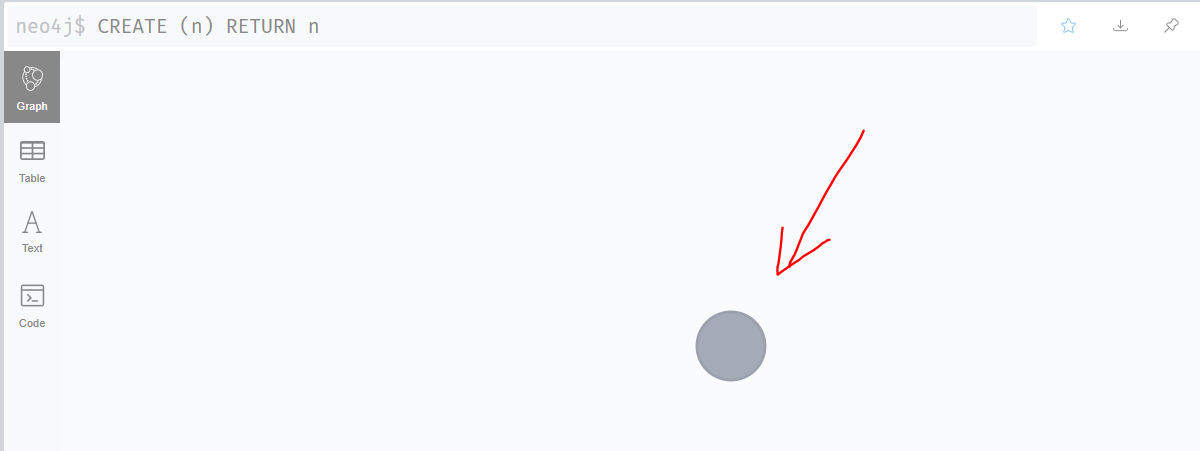 </p>

* **Примечание:** при выполнении такой команды вернется "вершина-пустышка", которая по-большому счету бесполезна.

**Пример №2**

* **Создание двух вершин:** `CREATE (n), (p)`

* **Создание вершины с лейблом:** `CREATE (n:Person)`

**Пример №3**

* **Создание вершины с несколькими лейблами:** `CREATE (n:Person:Russian)`

* **Примечание:** мы можем обращаться к вершине как к Person, так и как к Russian.

**Пример №4**

* **Создание ноды, лейбла и свойства:** `CREATE (n:Person {name: 'Andy', title: 'Developer'})`

**Пример №5**

* **Создание связи между двумя нодами:**

`MATCH
  (a:Russian),
  (b:Person)
WHERE b.name = 'Andy'
CREATE (a)-[r:RELTYPE]->(b)
RETURN type(r)`

<p style="text-align: center;"> 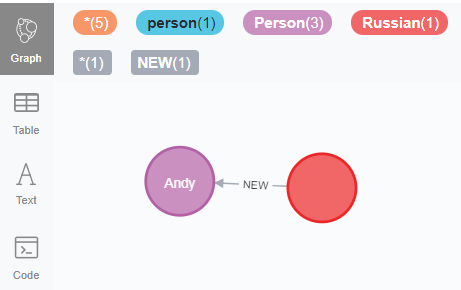 </p>

**Пример №6**

* **Создание связи и ее свойства:**

`MATCH
  (a:Russian),
  (b:Person)
WHERE b.name = 'Andy'
CREATE (a)-[r:RELTYPE {name: 'newName'}]->(b)
RETURN type(r), r.name`

<p style="text-align: center;"> 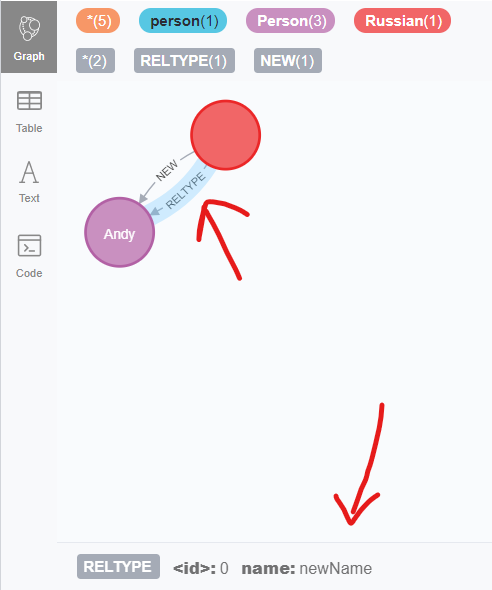 </p>


### Оператор MATCH

* **Вернуть все вершины:** `MATCH (n) RETURN n`

* **Вернуть все вершины с лейблом Person:** `MATCH (p:Person) RETURN p`

* **Вернуть связанные узлы к узлу first:** `MATCH (first {name: 'Andy'})--(second) RETURN second`

**Примечание:** символ `--` обозначает связь вне зависимости от типа или направления.

<p style="text-align: center;"> 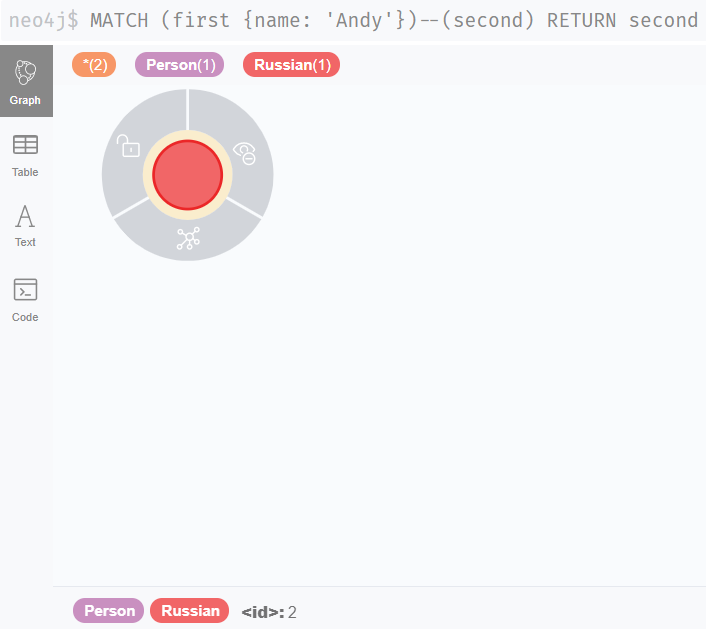 </p>

* **Вернуть связанные узлы в зависимости от направления:** 

`MATCH (:Person {name: 'Andy'})-->(other)
RETURN other`

**Примечание:** отношения могут быть `--`, `-->`, `<--`.

* **Вернуть тип отношения:** `MATCH (:Person {name: 'Andy'})-[r]->(other) RETURN type(r)`

<p style="text-align: center;"> 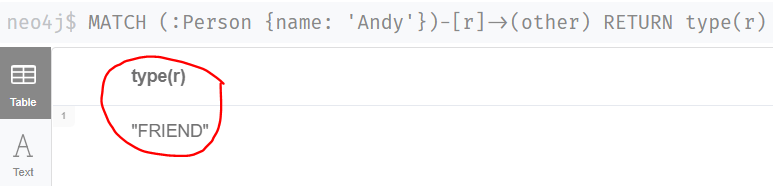 </p>

* **Вернуть что-либо с указанием названия связи (например, имя хозяина собаки по отношению FRIEND):** 

`MATCH (d:Dog)<-[:FRIEND]-(person) RETURN person.name`

<p style="text-align: center;"> 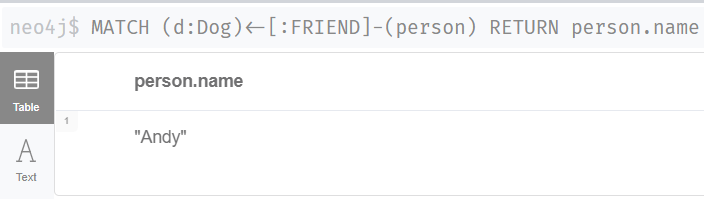 </p>

**Есть граф**

<p style="text-align: center;"> 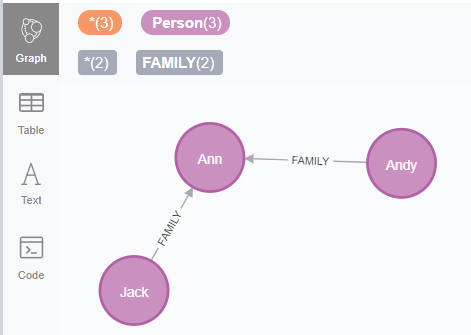 </p>

* **Вернуть что-либо с указанием связей с двух сторон (например, вернуть имя отца и мужа, у которых есть связь FAMILY с объектом woman):**

`MATCH (father {name: 'Jack'})-[:FAMILY]->(woman)<-[:FAMILY]-(husband)
RETURN father.name, husband.name`

 **Результат**
 
 <p style="text-align: center;"> 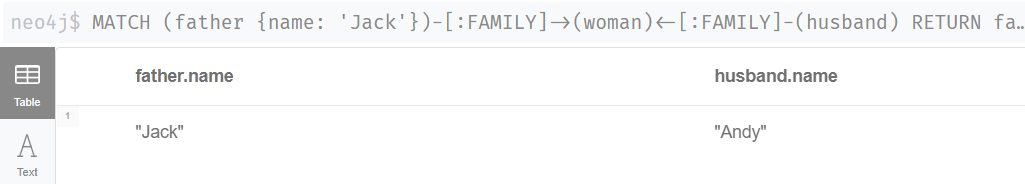 </p>


### Запрос WITH

Используя WITH, вы можете управлять выводом до того, как он будет передан в следующие части запроса. Действия могут касаться формы и/или количества записей в наборе результатов.

Одним из распространенных способов использования WITH является ограничение количества записей, которые затем передаются в другие предикаты MATCH.

Другое использование - фильтрация агрегированных значений. WITH используется для введения агрегатов, которые затем можно использовать в предикатах в WHERE.

WITH также используется для разделения чтения и обновления графа. Каждая часть запроса должна быть доступна только для чтения или только для записи. При переходе от части записи к части чтения переключение должно выполняться с помощью запроса WITH.



### Оператор SET

SET используется для обновления лейблов у нод, а также свойств у нод и связей.

* **Создание нового свойства (фамилии) у ноды (человек):**

`MATCH (n {name: 'Andy'})
SET n.surname = 'Taylor'
RETURN n.name, n.surname`

* **Создание нового свойства только у определенных вершин:**

`MATCH (n {name: 'Andy'})
SET (CASE WHEN n.surname = "Taylor" THEN n END).worksIn = 'Malmo'
RETURN n.name, n.worksIn`

Результат:

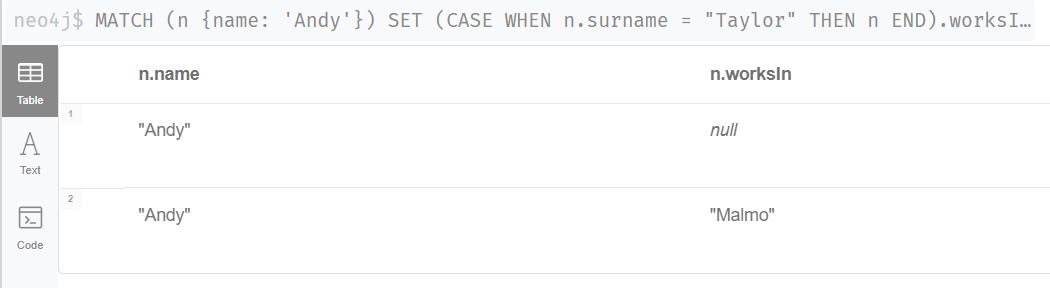

* **Обновить тип свойства (например, число к строке):**

`MATCH (n {name: 'Andy'})
SET n.age = toString(n.age)
RETURN n.name, n.surname, n.age`

Результат:

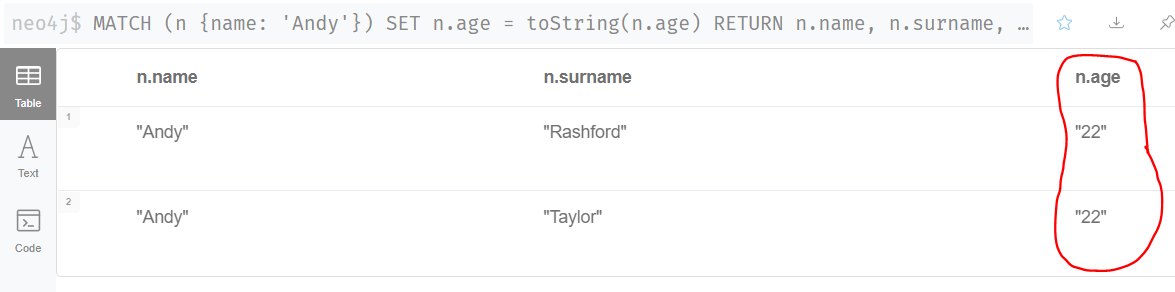

* **Удалить свойство:** 

`MATCH (n {name: 'Andy'})
SET n.name = null
RETURN n.name, n.age`

* **Удалить все свойства:** 

`MATCH (p {name: 'Peter'})
SET p = {}
RETURN p.name, p.age`

* **Заменить все свойства:** 

`MATCH (p {name: 'Peter'})
SET p = {name: 'Peter Smith', position: 'Entrepreneur'}
RETURN p.name, p.age, p.position`

* **Установить лейблы вершинам:**

`MATCH (n {name: 'George'})
SET n:Swedish:Bossman
RETURN n.name, labels(n) AS labels`

### Оператор ORDER BY

ORDER BY используется для сортировки возвращаемых элементов в определенном порядке. Данный оператор следует строго после RETURN или WITH.

* **Пример сортировки по свойству name (в порядке алфавита):**

`MATCH (n)
RETURN n.name, n.age
ORDER BY n.name`

Результат:

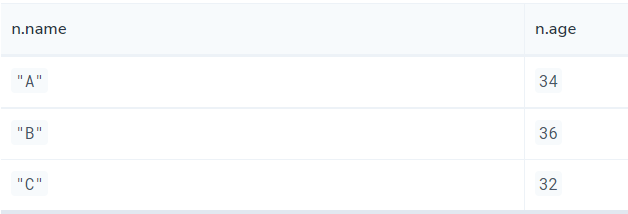

* **Сортировка по нескольким атрибутам:**

`MATCH (n)
RETURN n.name, n.age
ORDER BY n.age, n.name`

Результат:

<p style="text-align: center;"> 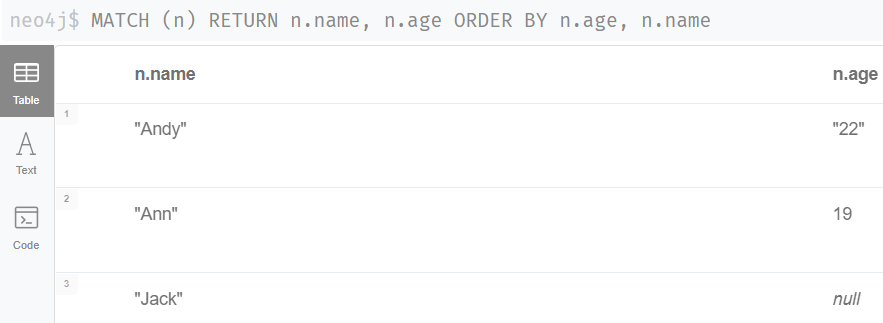 </p>

* **Сортировка в возрастающем порядке (DESC):**

`MATCH (n)
RETURN n.name, n.age
ORDER BY n.name DESC`

* **Сортировка с оператором WITH:**

`MATCH (n)
WITH n ORDER BY n.age
RETURN collect(n.name) AS names`

Результат:

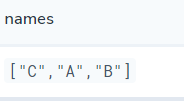

### Оператор DELETE

* **Удаление всех узлов и связей (используется при небольшом количестве данных):**

`MATCH (n)
DETACH DELETE n`

* **Удаление узла и всех его связей:**

`MATCH (n {name: 'Andy'})
DETACH DELETE n`

* **Удаление только связей:**

`MATCH (n {name: 'Andy'})-[r:FAMILY]->()
DELETE r`

### Оператор UNION

UNION объединяет результаты двух запросов.

* **Объединение двух запросов с сохранением дубликатов:**

`MATCH (n:Actor)
RETURN n.name AS name
UNION ALL
MATCH (n:Movie)
RETURN n.title AS name`

* **Объединение двух запросов с удалением дубликатов (без слова ALL):**

`MATCH (n:Actor)
RETURN n.name AS name
UNION
MATCH (n:Movie)
RETURN n.title AS name`

### Оператор LOAD CSV

Neo4j также позволяет загружать данные из CSV файлов.

Пусть есть следующий CSV файл 

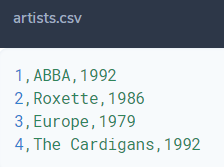

* **Обычная CSV файла:**

`LOAD CSV FROM 'file:///artists.csv' AS line
CREATE (:Artist {name: line[1], year: toInteger(line[2])})`

* **Загрузка CSV файла по ссылке:**

`LOAD CSV FROM 'http://data.neo4j.com/bands/artists.csv' AS line CREATE (:Artist {name: line[1],
  year: toInteger(line[2])})`
  
* **Загрузка CSV с заголовками используется след.запрос:** `LOAD CSV WITH HEADERS FROM ...`

* **Загрузка CSV с указанием разделителя:** 

`LOAD CSV FROM 'file:///artists-fieldterminator.csv' AS line FIELDTERMINATOR ';'
CREATE (:Artist {name: line[1], year: toInteger(line[2])})`

* **Загрузка большого количества данных**

При загрузке большого количества данных можно использовать периодическое сохранение с помощью USING PERIODIC COMMIT. Это сокращает расходы памяти на проведение операции. По дефолту, сохранение установлено через каждые 1000 строк.

Пример:

`USING PERIODIC COMMIT LOAD CSV FROM 'file:///artists.csv' AS line
CREATE (:Artist {name: line[1], year: toInteger(line[2])})`

### Сравнение SQL и Cypher

Возьмем хорошоизвестную базу данных приложения ретейла **Northwind**. Посмотрим как она будет представлена в виде **реляционной** модели и **графовой**.

<p style="text-align: center;"> 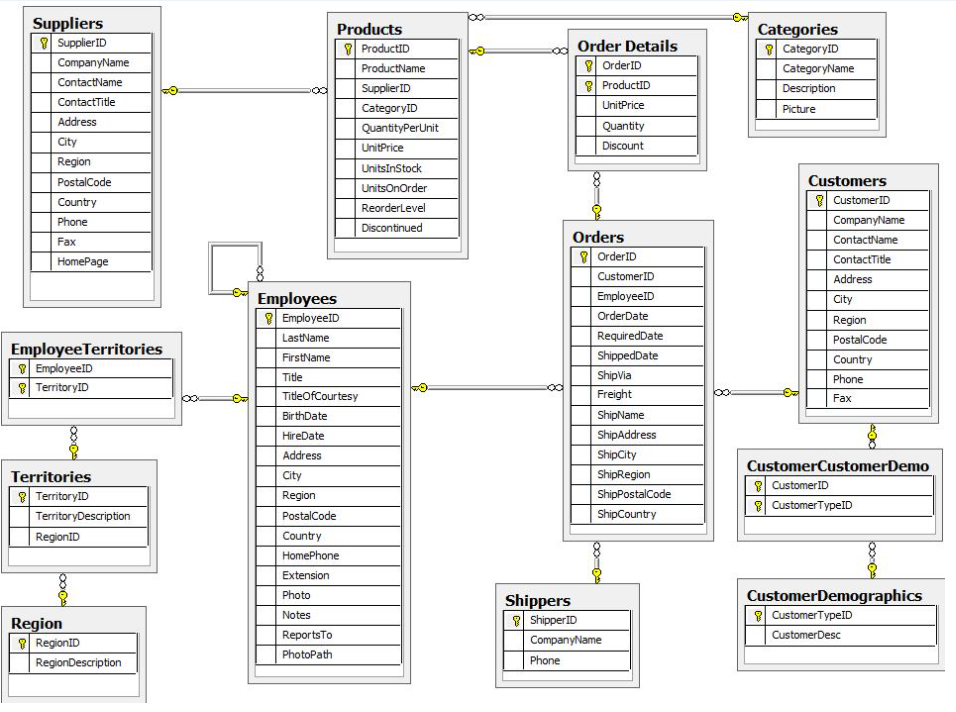 </p>

<p style="text-align: center;"> 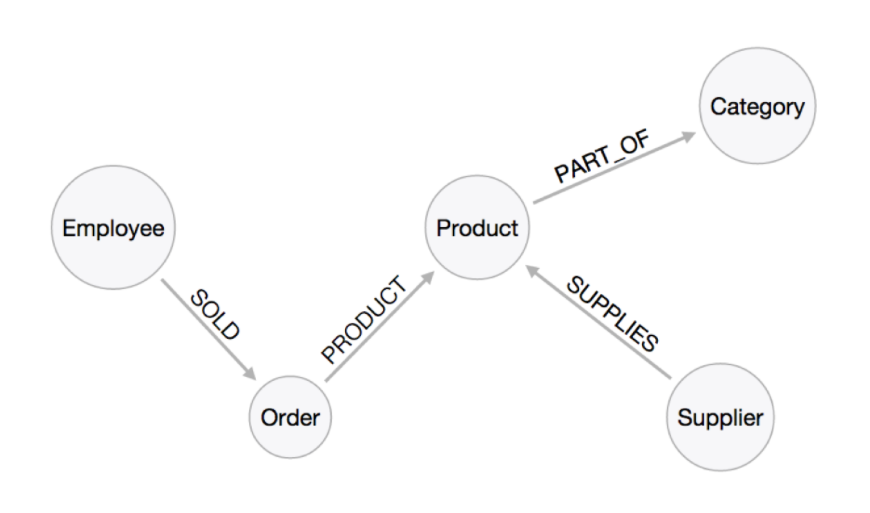 </p>

В целом простые запросы практически похожи и по сложности, и по размерам. Однако, в некоторых ситуациях намного проще использовать Cypher. Разберем некоторые из них.

* **Объединение Products с Customers**

Например, нам нужно посмотреть, кто купил шоколад. Для этого согласно ER-модели необходимо соединить 4 таблицы.

`SELECT DISTINCT c.CompanyName
FROM customers AS c
JOIN orders AS o ON (c.CustomerID = o.CustomerID)
JOIN order_details AS od ON (o.OrderID = od.OrderID)
JOIN products AS p ON (od.ProductID = p.ProductID)
WHERE p.ProductName = 'Chocolade';`

Аналогичная ситуация в графовой модели будет выглядеть так:

`MATCH (p:Product {productName:"Chocolade"})<-[:PRODUCT]-(:Order)<-[:PURCHASED]-(c:Customer)
RETURN distinct c.companyName;`

Прочесть такую запись также намного легче: покупатель (Customer) сделал заказ (order) продукта шоколад.

* **Хотим найти покупателей без заказов**

В SQL для этого придется использовать OUTER JOIN и запрос будет таким:

`SELECT p.ProductName, sum(od.UnitPrice * od.Quantity) AS Volume
FROM customers AS c
LEFT OUTER JOIN orders AS o ON (c.CustomerID = o.CustomerID)
LEFT OUTER JOIN order_details AS od ON (o.OrderID = od.OrderID)
LEFT OUTER JOIN products AS p ON (od.ProductID = p.ProductID)
WHERE c.CompanyName = 'Drachenblut Delikatessen'
GROUP BY p.ProductName
ORDER BY Volume DESC;`

В Cypher же мы для этого используем OPTIONAL MATCH:

`MATCH (c:Customer {companyName:"Drachenblut Delikatessen"})
OPTIONAL MATCH (p:Product)<-[pu:PRODUCT]-(:Order)<-[:PURCHASED]-(c)
RETURN p.productName, toInteger(sum(pu.unitPrice * pu.quantity)) AS volume
ORDER BY volume DESC;`

* **Топ-10 продавцов**

SQL:

`SELECT e.EmployeeID, count(*) AS Count
FROM Employee AS e
JOIN Order AS o ON (o.EmployeeID = e.EmployeeID)
GROUP BY e.EmployeeID
ORDER BY Count DESC LIMIT 10;`

Cypher:

`MATCH (:Order)<-[:SOLD]-(e:Employee)
RETURN e.name, count(*) AS cnt
ORDER BY cnt DESC LIMIT 10`



## Наборы данных в Neo4j

Neo4j также предоставляет встроенные наборы данных, а также инструкции по их применению:

* Movies (для начинающих)
* Network and IT-management
* Crime Investigation
* OpenStreetMap (описание возможностей использования данных OSM и манипуляций с ними на примере датасета Central Park NY)
* Graph Data Science (описание возможностей фреймворка Graph DS)
* Bloom Visual Discovery (использование Neo4j Bloom для визуализации)
* Recommendations
* Fraud Detection
* Russian Twitter Trolls

## Дополнительные источники

1. https://habr.com/ru/post/274383/
2. https://ru.wikipedia.org/wiki/%D0%93%D1%80%D0%B0%D1%84%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B1%D0%B0%D0%B7%D0%B0_%D0%B4%D0%B0%D0%BD%D0%BD%D1%8B%D1%85
3. Мануал по использованию операторов Cypher и функций: https://neo4j.com/docs/cypher-manual/current/clauses/match/
4. Алгоритмы GDS: https://neo4j.com/docs/graph-data-science/current/algorithms/
5. https://habr.com/ru/post/470541/